In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Some of the release years don't match the year specified in the "released" column.

Using Regular Expression to extract the correct year from "released" column 

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# Define a regular expression pattern to match the year (4 digits)
pattern = r'(\d{4})'

# Extract the year and add it as a new column 'ReleaseYear'
df['release_year'] = df['released'].str.extract(pattern)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [11]:
# Missing Data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [12]:
# Data Types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
# Filling missing rows in order to perform the conversion
df = df.fillna(0)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [30]:
# pd.set_option('display.max_rows', None)
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,Janu
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,Apri
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,Apri
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,Janu


In [15]:
# Dropping any duplicates

df.nunique()

name            7512
rating            13
genre             19
year              41
released        3415
score             73
votes            937
director        2949
writer          4536
star            2815
country           60
budget           414
gross           7473
company         2386
runtime          139
release_year      42
dtype: int64

There are 7512 movie names with 0 missing values for a dataset containing 7668 rows.

There is a possibility that some movie names might be repeated.

Let's check that

In [16]:
duplicate_names = df[df.duplicated(subset='name', keep=False)]
duplicate_names

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,0,21202829,Metro-Goldwyn-Mayer (MGM),134.0,1980
18,The Fog,R,Horror,1980,"February 8, 1980 (United States)",6.8,66000.0,John Carpenter,John Carpenter,Adrienne Barbeau,United States,1000000,21448782,AVCO Embassy Pictures,89.0,1980
31,Prom Night,R,Horror,1980,"July 18, 1980 (United States)",5.4,16000.0,Paul Lynch,William Gray,Leslie Nielsen,Canada,0,14796236,Guardian Trust Company,92.0,1980
46,The Island,R,Action,1980,"June 13, 1980 (United States)",5.3,3900.0,Michael Ritchie,Peter Benchley,Michael Caine,United States,22000000,15716828,Universal Pictures,109.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,The Kid,R,Biography,2019,"March 8, 2019 (United States)",5.9,7400.0,Vincent D'Onofrio,Vincent D'Onofrio,Jake Schur,United States,8000000,1561698,Mimran Schur Pictures,100.0,2019
7529,Child's Play,R,Drama,2019,"June 21, 2019 (United States)",5.8,47000.0,Lars Klevberg,Tyler Burton Smith,Tim Matheson,Canada,10000000,44907074,Orion Pictures,90.0,2019
7536,Shaft,R,Action,2019,"June 14, 2019 (United States)",6.4,48000.0,Tim Story,Ernest Tidyman,Samuel L. Jackson,United States,35000000,21360215,Davis Entertainment,111.0,2019
7556,After the Wedding,PG-13,Drama,2019,"November 1, 2019 (United Kingdom)",6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,0,2790019,Sony Pictures Classics,112.0,2019


In [26]:
duplicate_rows = df[df.name == "Shaft"]
duplicate_rows

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
3727,Shaft,R,Action,2000,"June 16, 2000 (United States)",6.0,75000.0,John Singleton,Ernest Tidyman,Samuel L. Jackson,Germany,46000000,107626125,Paramount Pictures,99.0,2000
7536,Shaft,R,Action,2019,"June 14, 2019 (United States)",6.4,48000.0,Tim Story,Ernest Tidyman,Samuel L. Jackson,United States,35000000,21360215,Davis Entertainment,111.0,2019


These movies have the same name but are released on different dates/years

## Finding Correlation in the data

### Numeric Data

Text(0, 0.5, 'Gross')

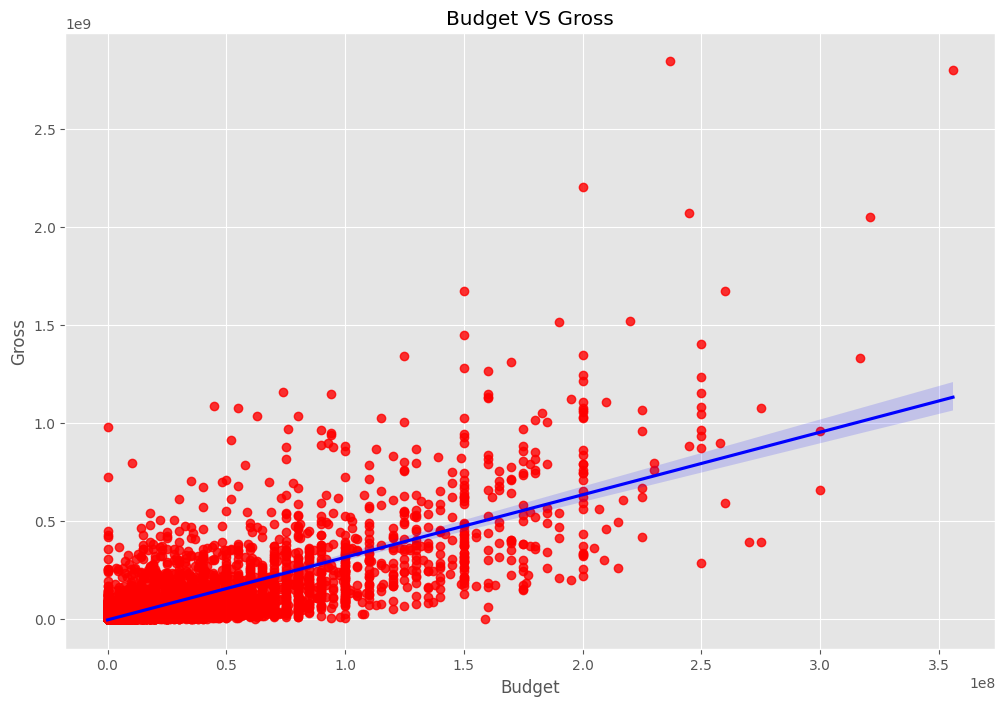

In [35]:
# Scatterplot with Budget Vs Gross

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})
plt.title("Budget VS Gross")
plt.xlabel("Budget")
plt.ylabel("Gross")

In [32]:
numeric_df = df.select_dtypes(['float64', 'int64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


There is a high correlation between budget and gross, votes and gross, votes and score

Text(120.72222222222221, 0.5, 'Movie Features')

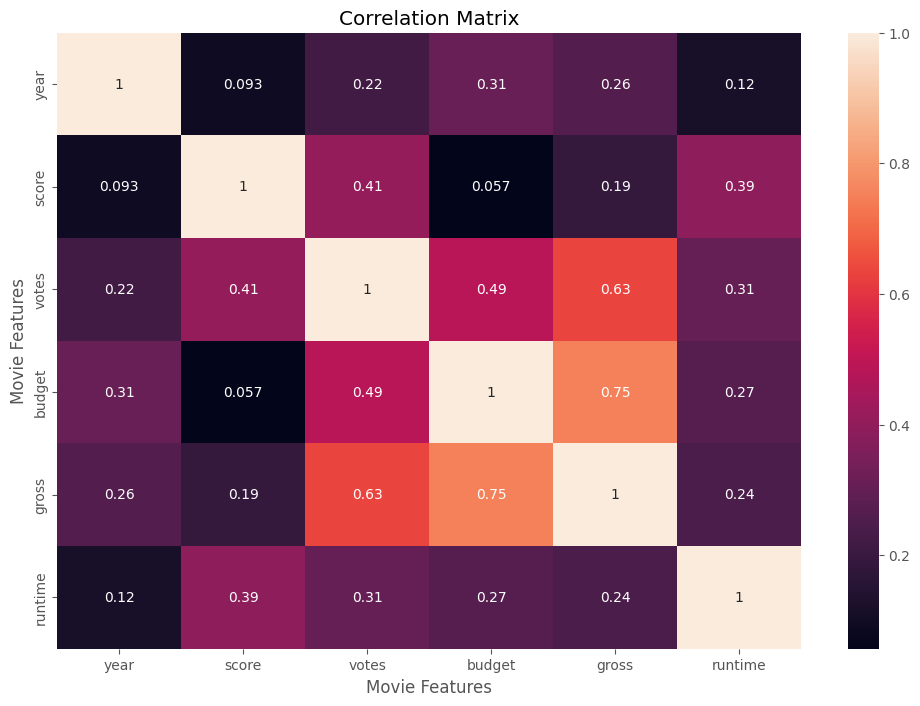

In [36]:
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [42]:
df = df.sort_values(by='gross', ascending=False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


### Categorical Data

In [45]:
df_numerized = df.copy()

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,533,6,0,2009,697,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,30
7445,535,6,0,2019,184,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,40
3045,6896,6,6,1997,705,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,18
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,36
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,1278,4.5,274.0,117,83,2798,56,0,0,1160,92.0,11
1614,1745,7,10,1989,56,5.2,1300.0,1033,1744,167,55,0,0,147,85.0,10
1606,2691,7,8,1989,258,6.0,2900.0,2743,947,1196,7,0,0,2238,89.0,10
1601,3836,0,4,1989,1161,7.1,1500.0,1105,1697,682,19,0,0,505,104.0,11


In [47]:
correlation_matrix = df_numerized.corr()
correlation_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,-0.003775
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.100897
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.217782
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.027606


In [48]:
corr_pairs = correlation_matrix.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
                                ...   
release_year  budget          0.300236
              gross           0.255130
              company        -0.014144
              runtime         0.120344
              release_year    1.000000
Length: 256, dtype: float64

In [52]:
sorted_corr_pairs = corr_pairs.sort_values()
high_corr = sorted_corr_pairs[sorted_corr_pairs > 0.5]
high_corr

gross         votes           0.632870
votes         gross           0.632870
budget        gross           0.750157
gross         budget          0.750157
release_year  year            0.996397
year          release_year    0.996397
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
release_year  release_year    1.000000
dtype: float64